In [259]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# allow plots to appear in the notebook
%matplotlib inline

In [260]:
#Import the data
weather_data = pd.read_csv("~/workspace/dat11syd/students/surenchand/lesson-07/hwk/seattleWeather_1948-2017.csv")

In [261]:
#Check the data read with columns
weather_data.head(10)

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
5,1948-01-06,0.44,48,39,True
6,1948-01-07,0.41,50,40,True
7,1948-01-08,0.04,48,35,True
8,1948-01-09,0.12,50,31,True
9,1948-01-10,0.74,43,34,True


In [262]:
#check data types
weather_data.dtypes

DATE     object
PRCP    float64
TMAX      int64
TMIN      int64
RAIN     object
dtype: object

In [263]:
# Check for NaN values
weather_data.isnull().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [264]:
#check data before drop nan
weather_data.shape

(25551, 5)

In [265]:
#drop any nan value
weather_data.dropna(how='any', inplace=True)

In [266]:
#check data after drop nan
weather_data.shape

(25548, 5)

In [267]:
#check null values are zero
weather_data.isnull().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

In [268]:
#Calculate the average 
PercpTotal = 0
PercpAve = 0
y=0
mylist =[]

for x in range (0,len(weather_data)):
    #Calculate the average if rows less than 7
    if x < 7:
        PercpTotal = PercpTotal + weather_data.iloc[x,1]
        PercpAve = PercpTotal/(x + 1)
    #Calculate the average if rows more than 7
    else:
        PercpTotal = PercpTotal + weather_data.iloc[x,1]
        PercpTotal = PercpTotal - weather_data.iloc[y,1]
        PercpAve = PercpTotal/7
        y += 1
    mylist.append(PercpAve)
#print (mylist)
weather_data = weather_data.assign(PERCP_AVE = mylist)
    

In [269]:
#shift the data by 1 so it is the average for last 7 days
weather_data['PERCP_AVE'] = weather_data['PERCP_AVE'].shift(1)

In [270]:
weather_data.head()

,DATE,PRCP,TMAX,TMIN,RAIN,PERCP_AVE
0,1948-01-01,0.47,51,42,True,NaN
1,1948-01-02,0.59,45,36,True,0.470000
2,1948-01-03,0.42,45,35,True,0.530000
3,1948-01-04,0.31,45,34,True,0.493333
4,1948-01-05,0.17,45,32,True,0.447500


In [271]:
#change object to date time stamp
weather_data['DATE'] = pd.to_datetime(weather_data['DATE'])

In [272]:
#convert date to year and month columns (new)
weather_data['year'] = pd.DatetimeIndex(weather_data['DATE']).year
weather_data['month'] = pd.DatetimeIndex(weather_data['DATE']).month

In [273]:
#Change rain predicted 1 and zero so logistic regression can be applied.
weather_data['RAIN']=np.where(weather_data['RAIN'] == True, 1,0)


In [274]:
#Checking on the means across all columns
weather_data.head()

,DATE,PRCP,TMAX,TMIN,RAIN,PERCP_AVE,year,month
0,1948-01-01,0.47,51,42,1,NaN,1948,1
1,1948-01-02,0.59,45,36,1,0.470000,1948,1
2,1948-01-03,0.42,45,35,1,0.530000,1948,1
3,1948-01-04,0.31,45,34,1,0.493333,1948,1
4,1948-01-05,0.17,45,32,1,0.447500,1948,1


In [275]:
#Checking on the means across all columns
weather_data.mean()

PRCP            0.106222
TMAX           59.543056
TMIN           44.513387
RAIN            0.426648
PERCP_AVE       0.106282
year         1982.474597
month           6.519140
dtype: float64

In [276]:
#determine max values for plotting
weather_data.max()

DATE         2017-12-14 00:00:00
PRCP                        5.02
TMAX                         103
TMIN                          71
RAIN                           1
PERCP_AVE                1.19429
year                        2017
month                         12
dtype: object

In [277]:
#Determine the mean by month
weather_data.groupby(['month']).mean()

,PRCP,TMAX,TMIN,RAIN,PERCP_AVE,year
month,,,,,,
1,0.183055,45.131797,35.208756,0.598157,0.182193,1982.500000
2,0.143023,48.994944,36.787664,0.557634,0.148076,1982.495450
3,0.127963,52.321659,38.393548,0.558525,0.131777,1982.500000
4,0.088505,57.521905,41.460952,0.475238,0.092873,1982.500000
5,0.058502,64.309217,46.733180,0.355300,0.059060,1982.500000
6,0.048522,69.653956,51.628694,0.301239,0.052675,1982.485224
7,0.023106,75.497696,55.005530,0.158065,0.026301,1982.500000
8,0.034968,75.233180,55.317512,0.190323,0.030635,1982.500000
9,0.059057,69.631729,51.754169,0.290138,0.055003,1982.489281


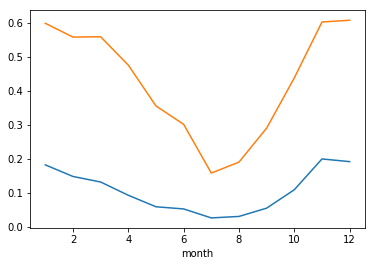

In [280]:
# Visualise the impact on rain with percipitation
import matplotlib.pyplot as plot
#df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
weather_data.groupby(['month']).mean()['PERCP_AVE'].plot()
weather_data.groupby(['month']).mean()['RAIN'].plot()


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f85c7954ac8>,
      dtype=object)

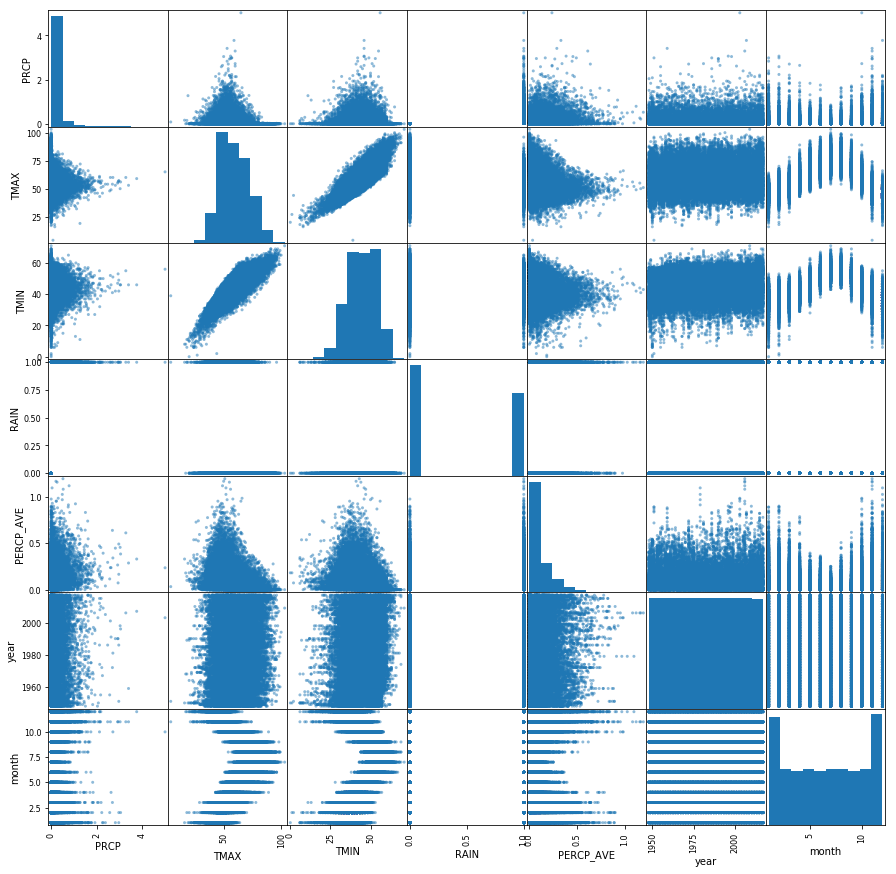

In [279]:
#scatter matrix to understand the impact of al variables
pd.scatter_matrix(weather_data, figsize=(15,15))

In [281]:
#select feature columns to predict the outcome for rain
from sklearn.model_selection import train_test_split
#trainging data set
weather_data_model=weather_data.loc[(weather_data.year < 2010) & (weather_data.year > 1949)]
feature_cols = ['PERCP_AVE','TMAX','TMIN']
X = weather_data_model[feature_cols]
y = weather_data_model.RAIN

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [283]:
X_train.describe()

,PERCP_AVE,TMAX,TMIN
count,1.643400e+04,16434.000000,16434.000000
mean,1.044884e-01,59.380370,44.377814
std,1.284850e-01,12.683786,8.810020
min,-3.489272e-16,4.000000,0.000000
25%,1.000000e-02,50.000000,38.000000
50%,6.000000e-02,58.000000,44.500000
75%,1.514286e-01,69.000000,52.000000
max,1.194286e+00,103.000000,71.000000


In [284]:
y_train.describe()

count    16434.000000
mean         0.425459
std          0.494428
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: RAIN, dtype: float64

In [285]:
# fit a logistic regression model 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [286]:
coeffs1 = zip(feature_cols, logreg.coef_[0])
list(coeffs1)

[('PERCP_AVE', 2.1574593855829898),
 ('TMAX', -0.23871402091072405),
 ('TMIN', 0.2534510198646978)]

In [287]:
#calculate accuracy between test and train data
y_pred_rain = logreg.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_rain))

0.7632347572106608


In [292]:
# Build confusion matrix
from sklearn.metrics import confusion_matrix
compare = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred_rain})
cm = confusion_matrix(compare['Actual'], compare['Predicted'])
print (cm)

[[2519  667]
 [ 630 1662]]


In [293]:
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Sensitivity :  0.790646578782172
Specificity :  0.725130890052356


Text(0,0.5,'Frequency')

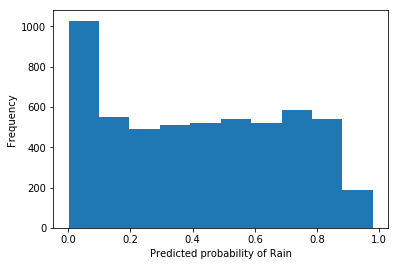

In [294]:
# plot the predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(y_pred_prob)
plt.xlabel('Predicted probability of Rain')
plt.ylabel('Frequency')

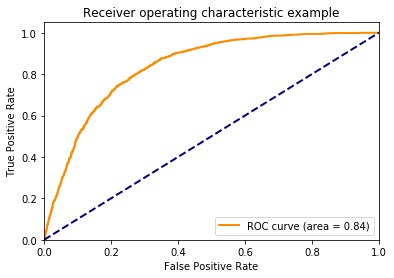

In [295]:
#ROC graph

# Import the Plotting library so we can draw the graph
import matplotlib.pyplot as plt

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr,tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [296]:
# predicter for rain
import numpy as np
y_pred_rain_1 = np.where(y_pred_prob > 0.35, 1, 0)

In [297]:
# new confusion matrix if we use above probablities to predict rain
cm= (metrics.confusion_matrix(y_test, y_pred_rain_1))
print (cm)

[[2078 1108]
 [ 292 2000]]


In [298]:
# new sesnsitivity, specificity and accuracy
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

accuracy = (cm[0,0]+cm[1,1])/np.sum(cm)
print('Accuracy : ', accuracy)

Sensitivity :  0.6522284996861268
Specificity :  0.8726003490401396
Accuracy :  0.7444322745527565


In [299]:
# Preparing for Cross Validation
from sklearn import cross_validation
kf = cross_validation.KFold(len(weather_data_model), n_folds=5, shuffle=True)
model_data=weather_data_model[['PERCP_AVE','TMAX','TMIN']]
y=weather_data_model.RAIN

In [300]:
# Cross validate for 5 folds
from sklearn import linear_model
mse_values = []
scores = []
n= 0
print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf:
    lm = linear_model.LinearRegression().fit(model_data.iloc[train_index], y.iloc[train_index])
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(model_data.iloc[test_index])))
    scores.append(lm.score(model_data, y))
    n+=1
    print ('Model', n)
    print ('MSE:', mse_values[n-1])
    print ('R2:', scores[n-1])


print ("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print ('Mean of MSE for all folds:', np.mean(mse_values))
print ('Mean of R2 for all folds:', np.mean(scores))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 0.16761908662364758
R2: 0.30513976163238477
Model 2
MSE: 0.1742939796158834
R2: 0.30511459588641254
Model 3
MSE: 0.16548175596752163
R2: 0.30511655563263107
Model 4
MSE: 0.17102400052622735
R2: 0.3051283976061855
Model 5
MSE: 0.17020177547182455
R2: 0.30512269641115275
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 0.1697241196410209
Mean of R2 for all folds: 0.30512440143375336


In [301]:
#average score for cross validation
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=100)
print (scores)
print (scores.mean())

[0.81363636 0.75454545 0.80909091 0.82727273 0.68636364 0.81363636
 0.70909091 0.66818182 0.79090909 0.67727273 0.75454545 0.75
 0.80909091 0.77272727 0.70454545 0.65454545 0.85454545 0.78181818
 0.67272727 0.86818182 0.57727273 0.83636364 0.72727273 0.69545455
 0.84545455 0.68181818 0.8        0.77727273 0.76255708 0.84018265
 0.71232877 0.76712329 0.80821918 0.68949772 0.74885845 0.72146119
 0.76712329 0.82191781 0.76255708 0.81278539 0.79452055 0.68949772
 0.8173516  0.73059361 0.83105023 0.70776256 0.70776256 0.73059361
 0.74429224 0.73515982 0.66210046 0.83561644 0.70776256 0.65296804
 0.83561644 0.65753425 0.8630137  0.71689498 0.76255708 0.77625571
 0.68949772 0.73515982 0.80821918 0.81278539 0.67123288 0.85844749
 0.6803653  0.70319635 0.80821918 0.74429224 0.78995434 0.73972603
 0.78082192 0.68949772 0.89954338 0.69406393 0.78538813 0.82648402
 0.69863014 0.79452055 0.78995434 0.80365297 0.79908676 0.76712329
 0.71559633 0.78899083 0.73853211 0.81651376 0.7706422  0.72018349
 

In [302]:
#using the original coeffients to validate the model
weather_data_validate=weather_data.loc[(weather_data.year < 2018) & (weather_data.year > 2009)]
X_Validate = weather_data_validate[feature_cols]
y_Validate = weather_data_validate.RAIN
y_pred_rain_validate = logreg.predict(X_Validate)
print(metrics.accuracy_score(y_Validate, y_pred_rain_validate))

0.7686746987951807


In [303]:
compare = pd.DataFrame({'Actual' : y_Validate, 'Predicted' : y_pred_rain_validate})
cm = confusion_matrix(compare['Actual'], compare['Predicted'])
print (cm)

[[1257  348]
 [ 324  976]]


In [304]:
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

accuracy = (cm[0,0]+cm[1,1])/np.sum(cm)
print('Accuracy : ', accuracy)

Sensitivity :  0.7831775700934579
Specificity :  0.7507692307692307
Accuracy :  0.7686746987951807


Text(0,0.5,'Frequency')

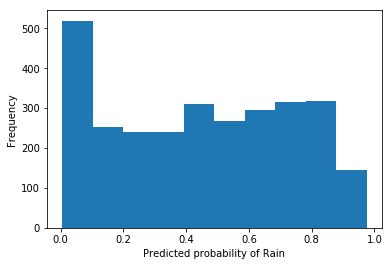

In [305]:
# plot the predicted probabilities
y_pred_prob = logreg.predict_proba(X_Validate)[:, 1]
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(y_pred_prob)
plt.xlabel('Predicted probability of Rain')
plt.ylabel('Frequency')

In [307]:
# predicter for rain using 0.35 as the predicted probablity
import numpy as np
y_pred_rain_2 = np.where(y_pred_prob > 0.35, 1, 0)

In [308]:
cm= (metrics.confusion_matrix(y_test, y_pred_rain_1))
print (cm)

[[2078 1108]
 [ 292 2000]]


In [309]:
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

accuracy = (cm[0,0]+cm[1,1])/np.sum(cm)
print('Accuracy : ', accuracy)

Sensitivity :  0.6522284996861268
Specificity :  0.8726003490401396
Accuracy :  0.7444322745527565
